# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram
from sklearn.cluster import AgglomerativeClustering
import pmdarima as pm
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import warnings
import calendar
from datetime import datetime as dt
from utils import *
warnings.filterwarnings("ignore")

# Initial EDA

In [2]:
# train = pd.read_csv('/datasets/main/forecast-nasi/train.csv', index_col='date')
train = pd.read_csv('train.csv', index_col='date')
train.index = pd.to_datetime(train.index)
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [ ]:
train.head(40)

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0
2013-01-01,5,1,BREAD/BAKERY,0.0,0
2013-01-01,6,1,CELEBRATION,0.0,0
2013-01-01,7,1,CLEANING,0.0,0
2013-01-01,8,1,DAIRY,0.0,0


In [ ]:
train.store_nbr.value_counts()

1     55572
46    55572
36    55572
37    55572
38    55572
39    55572
4     55572
40    55572
41    55572
42    55572
43    55572
44    55572
45    55572
47    55572
10    55572
48    55572
49    55572
5     55572
50    55572
51    55572
52    55572
53    55572
54    55572
6     55572
7     55572
8     55572
35    55572
34    55572
33    55572
32    55572
11    55572
12    55572
13    55572
14    55572
15    55572
16    55572
17    55572
18    55572
19    55572
2     55572
20    55572
21    55572
22    55572
23    55572
24    55572
25    55572
26    55572
27    55572
28    55572
29    55572
3     55572
30    55572
31    55572
9     55572
Name: store_nbr, dtype: int64

There are 55572 records from each of the 54 stores in the training set. 

<AxesSubplot: xlabel='date'>

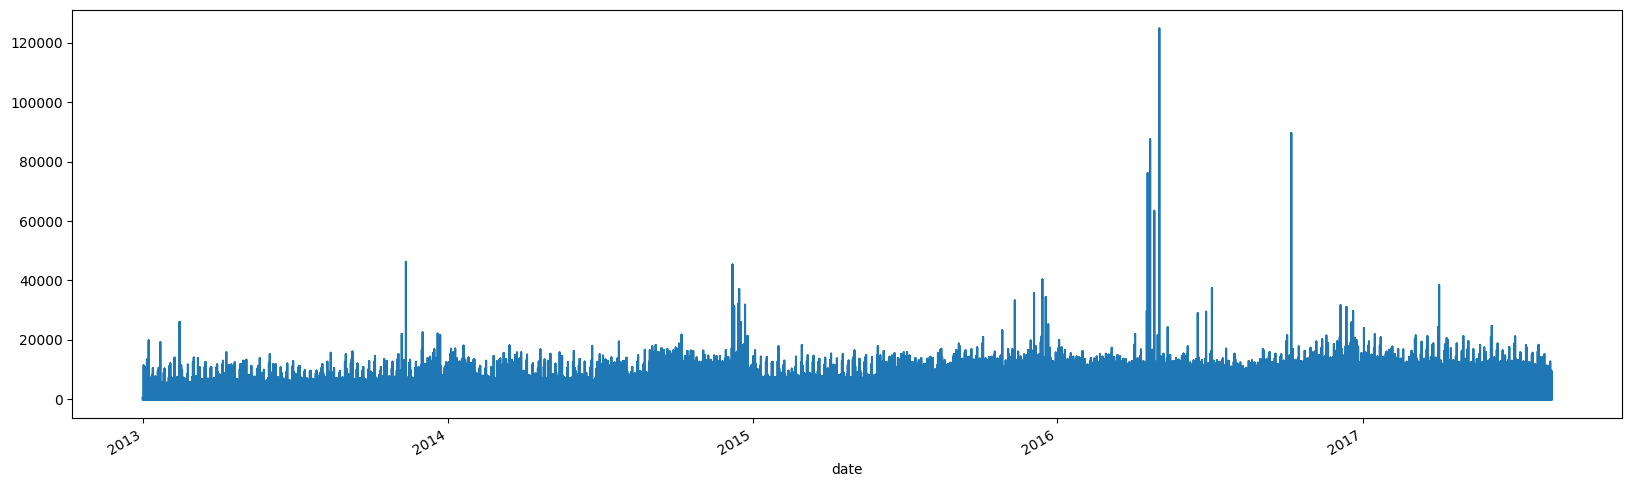

In [ ]:
train['sales'].plot(figsize=(20,6))

<AxesSubplot: xlabel='date'>

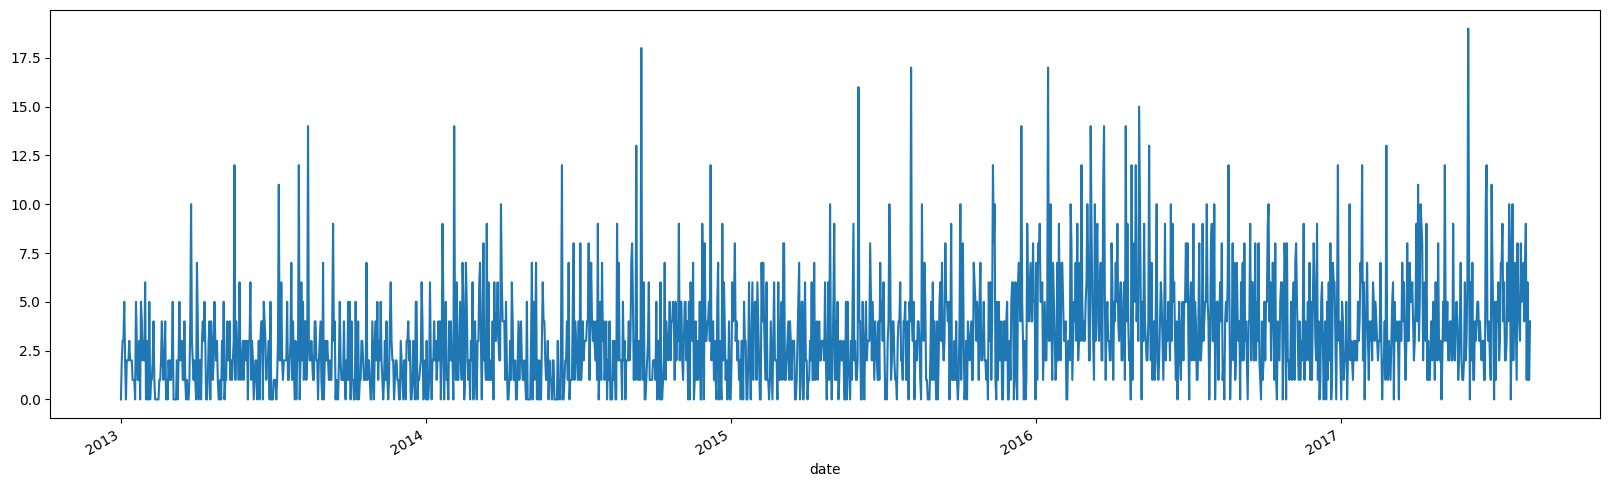

In [ ]:
df = train[(train['store_nbr']==1) & (train['family']=='AUTOMOTIVE')]
df.sales.plot(figsize=(20,6))

# ARIMA

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.10, random_state=5, shuffle=False)

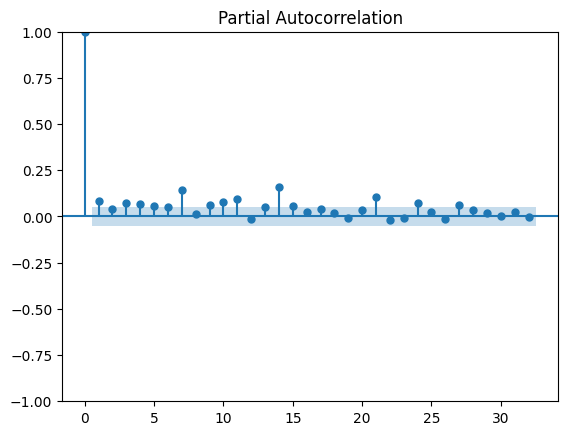

In [ ]:
plot_pacf(df_train.sales);

Augmented dicky fuller test - null hypothesis is assumes the time series to non stationary, reject null if test statistic is less then critical value 
Is or not stationary, if not, take away trends, cyclicality, noise and seasonality 
Auto correlation is when a time series is correlated to its shifted self 
Create stationarity, then attempt to forecast with stationary model
Tune p, q, d
Two things: Partial auto correlation function for p, Auto-correlation function for q, d is

Research how to forecast multilabel time series 
Feature modeling

In [ ]:
results = sm.tsa.stattools.adfuller(df_train.sales, autolag="AIC",regresults=True)
dfoutput = pd.Series(results[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in results[2].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                                                          -3.89194
p-value                                                                 0.002095
#Lags Used                     {'1%': -3.434743423170358, '5%': -2.8634804142...
Number of Observations Used                 Augmented Dickey-Fuller Test Results
Critical Value (1%)                                                    -3.434743
Critical Value (5%)                                                     -2.86348
Critical Value (10%)                                                   -2.567803
dtype: object


Given the results, the time series for this scenario is stationary. 

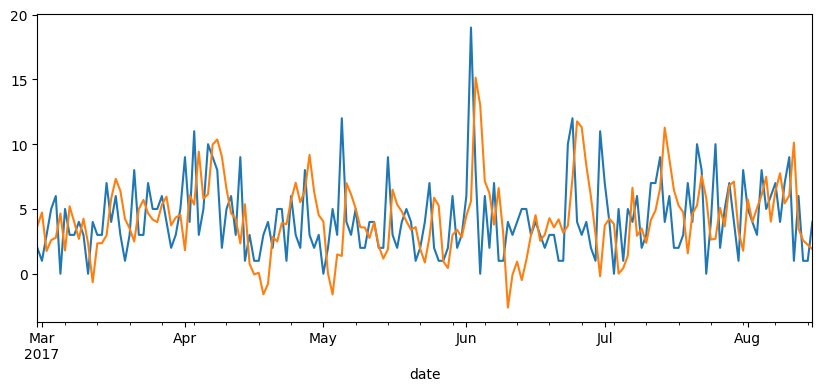

In [ ]:
model = sm.tsa.arima.model.ARIMA(df.sales, order=(30, 5, 0))
model_fit = model.fit()
pred = model_fit.predict(start=len(df_train), end=len(df_train)+len(df_test)-1)
df_test.sales.plot(figsize=(10,4))
pred.plot();

## Hypertuning

In [3]:
def compare_to_test(model, df_test, df_train):
    model_fit = model.fit()
    pred = model_fit.predict(start=len(df_train), end=len(df_train)+len(df_test)-1)
    df_test.sales.plot(figsize=(10,4))
    if pred.index.dtype == int:
        pred.index = df_test.index
    pred.plot()
    print(f"R2 Score: {r2_score(df_test.sales, pred)}")
    print(f"Mean Absolute Error: {mean_absolute_error(df_test.sales, pred)}")
    print(f"Root Mean Squared Error: {mean_squared_error(df_test.sales, pred, squared=False)}")
    print(f"MAPE: {mean_absolute_percentage_error(df_test.sales, pred)}")

R2 Score: -0.7745437543995253
Mean Absolute Error: 2.9514993659673547
Root Mean Squared Error: 3.8354985486259126
MAPE: 898975016162510.8


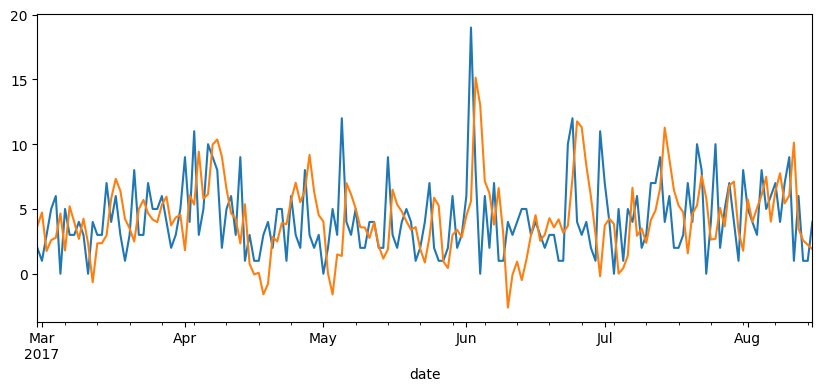

In [ ]:
compare_to_test(model, df_test, df_train)

<AxesSubplot: xlabel='date'>

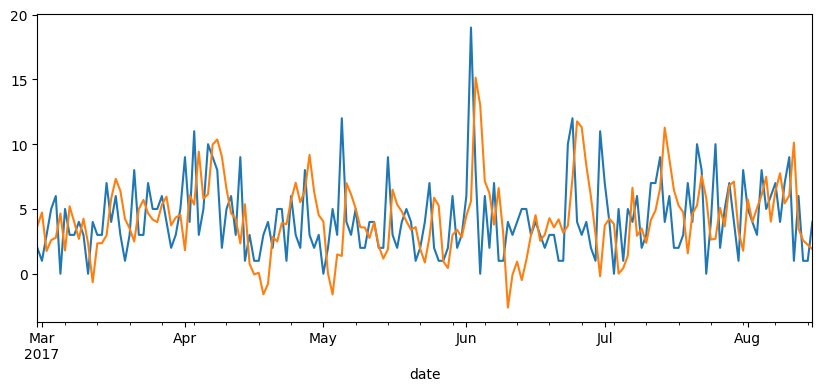

In [ ]:
model2 = sm.tsa.arima.model.ARIMA(df.sales, order=(6, 1, 0))
compare_to_test(model2, df_test, df_train)

R2 Score:  0.05901134233638017
Mean Absolute Error:  2.0826242207512835
Root Mean Squared Error:  2.792998233460736


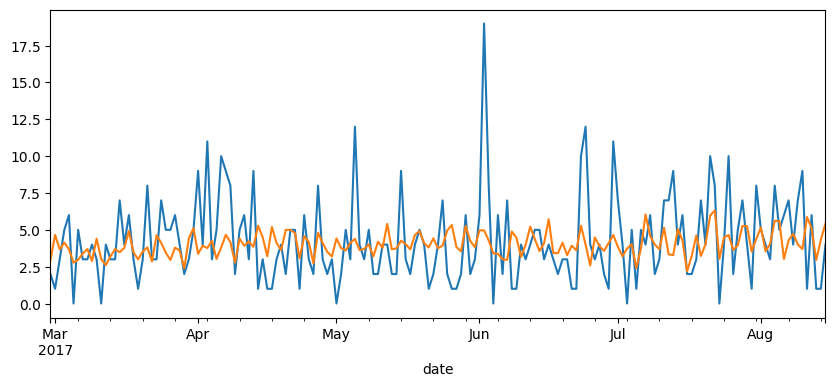

In [ ]:
model3 = sm.tsa.arima.model.ARIMA(df.sales, order=(50, 1, 2))
compare_to_test(model3, df_test, df_train)

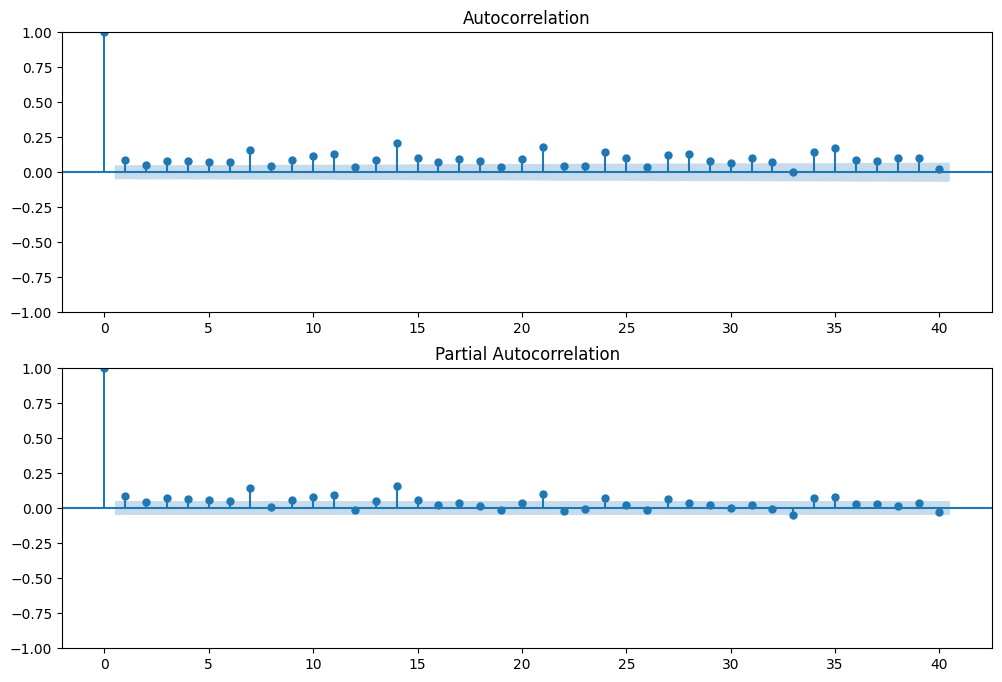

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_train.sales, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_train.sales, lags=40, ax=ax2)# , lags=40

## Hypertuning with SARIMA

R2 Score:  -1.006914895282362
Mean Absolute Error:  3.2047983426839606
Root Mean Squared Error:  4.078898936298522


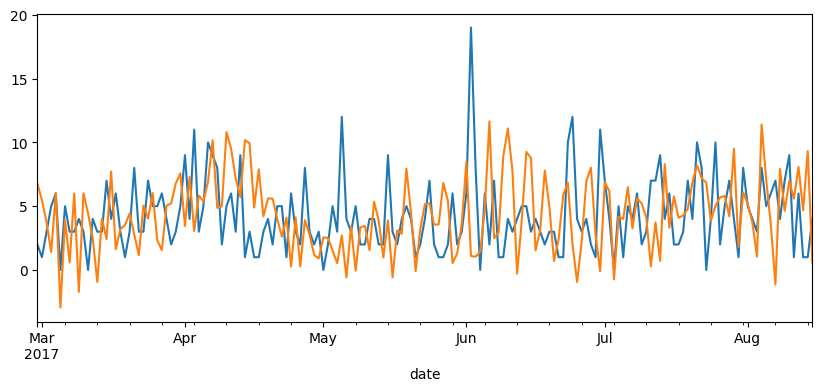

In [ ]:
model4 = sm.tsa.arima.model.ARIMA(df.sales, order=(50, 1, 2), seasonal_order=(0, 4, 1, 4))
compare_to_test(model4, df_test, df_train)

R2 Score:  -1.006914895282362
Mean Absolute Error:  3.2047983426839606
Root Mean Squared Error:  4.078898936298522


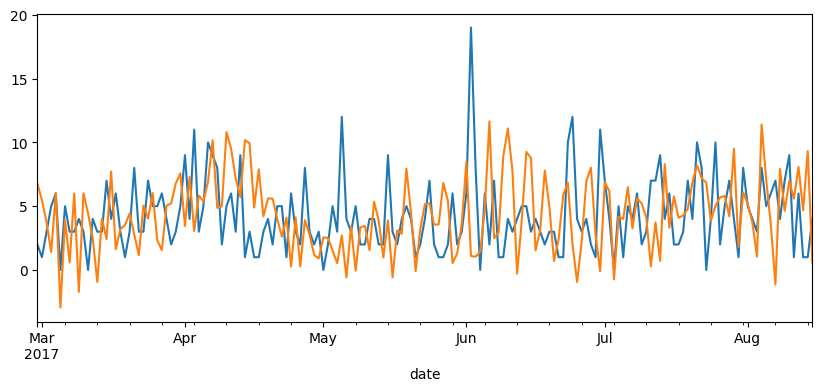

In [ ]:
model5 = sm.tsa.arima.model.ARIMA(df.sales, order=(50, 1, 2), seasonal_order=(0, 3, 0, 12))
compare_to_test(model5, df_test, df_train)

# Data cleaning and engineering for exogenous features

Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this. Therefore, I will include an indicator column for this. On top of that, I will create indicators for holidays along with utilizing the daily oil price for Ecuador, considering that it is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.

In [4]:
# stores = pd.read_csv('/datasets/main/forecast-nasi/stores.csv')
# holidays = pd.read_csv('/datasets/main/forecast-nasi/holidays_events.csv')
# oil = pd.read_csv('/datasets/main/forecast-nasi/oil.csv')
stores = pd.read_csv('stores.csv')
holidays = pd.read_csv('holidays_events.csv')
oil = pd.read_csv('oil.csv')

holidays.date = pd.to_datetime(holidays.date)
oil.date = pd.to_datetime(oil.date)

In [ ]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [ ]:
holidays.head(20)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [ ]:
stores.head(20)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [ ]:
stores.state.value_counts()

Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2
Los Rios                           2
El Oro                             2
Chimborazo                         1
Imbabura                           1
Bolivar                            1
Pastaza                            1
Santa Elena                        1
Loja                               1
Esmeraldas                         1
Name: state, dtype: int64

In [ ]:
stores.city.value_counts()

Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: city, dtype: int64

There are city-wide holidays, state-wide holidays and nation-wide holidays. 

In [ ]:
len(holidays.date.unique())

312

Some holidays occur on the same day. The oil dataset doesn't have prices for every single day. Therefore, my first step is to fill in the missing days via interpolation. 

In [5]:
dates = pd.DataFrame(train.index.unique())
exog = dates.merge(oil, how='left', left_on=dates['date'], right_on=oil['date'])
exog = exog[['date_x', 'dcoilwtico']]
exog = exog.rename(columns={'date_x': 'date'})
exog['dcoilwtico'] = exog['dcoilwtico'].interpolate(method='nearest')
exog

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-05,93.12
...,...,...
1679,2017-08-11,48.81
1680,2017-08-12,48.81
1681,2017-08-13,47.59
1682,2017-08-14,47.59


In [ ]:
exog['dcoilwtico'].isnull().sum()

1

The only remaining null is the very first entry.

In [6]:
exog['dcoilwtico'][0] = exog['dcoilwtico'][1:10].mean()
exog

,date,dcoilwtico
0,2013-01-01,93.205556
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-05,93.120000
...,...,...
1679,2017-08-11,48.810000
1680,2017-08-12,48.810000
1681,2017-08-13,47.590000
1682,2017-08-14,47.590000


In [ ]:
holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [7]:
holidays_city = holidays[holidays['locale']=='Local']
holidays_state = holidays[holidays['locale']=='Regional']
holidays_national = holidays[holidays['locale']=='National']

In [8]:
indicator_holidays_national = exog.merge(holidays_national, how='left', left_on=exog['date'], right_on=holidays_national['date'])
indicator_holidays_national = indicator_holidays_national[['date_x', 'date_y']]
indicator_holidays_national.date_y[indicator_holidays_national.date_y.notnull()] = 1
indicator_holidays_national = indicator_holidays_national.fillna(0)
indicator_holidays_national = indicator_holidays_national.rename(columns={'date_x':'date', 'date_y': 'National Holiday'})
indicator_holidays_national

,date,National Holiday
0,2013-01-01,1
1,2013-01-02,0
2,2013-01-03,0
3,2013-01-04,0
4,2013-01-05,1
...,...,...
1683,2017-08-11,1
1684,2017-08-12,0
1685,2017-08-13,0
1686,2017-08-14,0


There seem to be duplicates that have to be removed.

In [9]:
indicator_holidays_national = indicator_holidays_national.drop_duplicates()
indicator_holidays_national

,date,National Holiday
0,2013-01-01,1
1,2013-01-02,0
2,2013-01-03,0
3,2013-01-04,0
4,2013-01-05,1
...,...,...
1683,2017-08-11,1
1684,2017-08-12,0
1685,2017-08-13,0
1686,2017-08-14,0


In [ ]:
holidays_state

,date,type,locale,locale_name,description,transferred
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
23,2012-11-06,Holiday,Regional,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo,False
24,2012-11-07,Holiday,Regional,Santa Elena,Provincializacion Santa Elena,False
47,2013-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
58,2013-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
76,2013-11-06,Holiday,Regional,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo,False
77,2013-11-07,Holiday,Regional,Santa Elena,Provincializacion Santa Elena,False
96,2014-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
112,2014-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False


In [10]:
indicator_holidays_state = pd.pivot_table(holidays_state[['date','locale_name']], columns=['locale_name'], index='date', aggfunc=len, fill_value=0)
indicator_holidays_state

locale_name,Cotopaxi,Imbabura,Santa Elena,Santo Domingo de los Tsachilas
date,,,,
2012-04-01,1,0,0,0
2012-06-25,0,1,0,0
2012-11-06,0,0,0,1
2012-11-07,0,0,1,0
2013-04-01,1,0,0,0
2013-06-25,0,1,0,0
2013-11-06,0,0,0,1
2013-11-07,0,0,1,0
2014-04-01,1,0,0,0


In [11]:
indicator_holidays_state = exog.merge(indicator_holidays_state, how='left', left_on=exog['date'], right_on=indicator_holidays_state.index)
indicator_holidays_state = indicator_holidays_state.drop(columns=['key_0', 'dcoilwtico'])
indicator_holidays_state = indicator_holidays_state.fillna(0)
indicator_holidays_state

,date,Cotopaxi,Imbabura,Santa Elena,Santo Domingo de los Tsachilas
0,2013-01-01,0.0,0.0,0.0,0.0
1,2013-01-02,0.0,0.0,0.0,0.0
2,2013-01-03,0.0,0.0,0.0,0.0
3,2013-01-04,0.0,0.0,0.0,0.0
4,2013-01-05,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1679,2017-08-11,0.0,0.0,0.0,0.0
1680,2017-08-12,0.0,0.0,0.0,0.0
1681,2017-08-13,0.0,0.0,0.0,0.0
1682,2017-08-14,0.0,0.0,0.0,0.0


In [ ]:
holidays_city

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
...,...,...,...,...,...,...
339,2017-12-05,Additional,Local,Quito,Fundacion de Quito-1,False
340,2017-12-06,Holiday,Local,Quito,Fundacion de Quito,True
341,2017-12-08,Holiday,Local,Loja,Fundacion de Loja,False
342,2017-12-08,Transfer,Local,Quito,Traslado Fundacion de Quito,False


In [12]:
indicator_holidays_city = pd.pivot_table(holidays_city[['date','locale_name']], columns=['locale_name'], index='date', aggfunc=len, fill_value=0)
indicator_holidays_city

locale_name,Ambato,Cayambe,Cuenca,El Carmen,Esmeraldas,Guaranda,Guayaquil,Ibarra,Latacunga,Libertad,Loja,Machala,Manta,Puyo,Quevedo,Quito,Riobamba,Salinas,Santo Domingo
date,,,,,,,,,,,,,,,,,,,
2012-03-02,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2012-04-12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2012-04-14,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2012-04-21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2012-05-12,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-12-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2017-12-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [13]:
indicator_holidays_city = exog.merge(indicator_holidays_city, how='left', left_on=exog['date'], right_on=indicator_holidays_city.index)
indicator_holidays_city = indicator_holidays_city.drop(columns=['key_0', 'dcoilwtico'])
indicator_holidays_city = indicator_holidays_city.fillna(0)
indicator_holidays_city

,date,Ambato,Cayambe,Cuenca,El Carmen,Esmeraldas,Guaranda,Guayaquil,Ibarra,Latacunga,Libertad,Loja,Machala,Manta,Puyo,Quevedo,Quito,Riobamba,Salinas,Santo Domingo
0,2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,2017-08-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,2017-08-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1681,2017-08-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1682,2017-08-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
exog = exog.merge(indicator_holidays_national, on='date')\
           .merge(indicator_holidays_state, on='date')\
           .merge(indicator_holidays_city, on='date')
exog = exog.set_index('date')

In [15]:
def payday(row):
    if row.day == 15:
        return 1
    elif row.day == calendar.monthrange(row.year, row.month)[1]:
        return 1
    else:
        return 0

exog['Payday'] = exog.index.to_series().apply(payday)
exog

,dcoilwtico,National Holiday,Cotopaxi,Imbabura,Santa Elena,Santo Domingo de los Tsachilas,Ambato,Cayambe,Cuenca,El Carmen,...,Loja,Machala,Manta,Puyo,Quevedo,Quito,Riobamba,Salinas,Santo Domingo,Payday
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,93.205556,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2013-01-02,93.140000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2013-01-03,92.970000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2013-01-04,93.120000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2013-01-05,93.120000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,48.810000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2017-08-12,48.810000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2017-08-13,47.590000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


R2 Score:  0.09696789605327594
Mean Absolute Error:  2.0388352205566753
Root Mean Squared Error:  2.7360880031275117


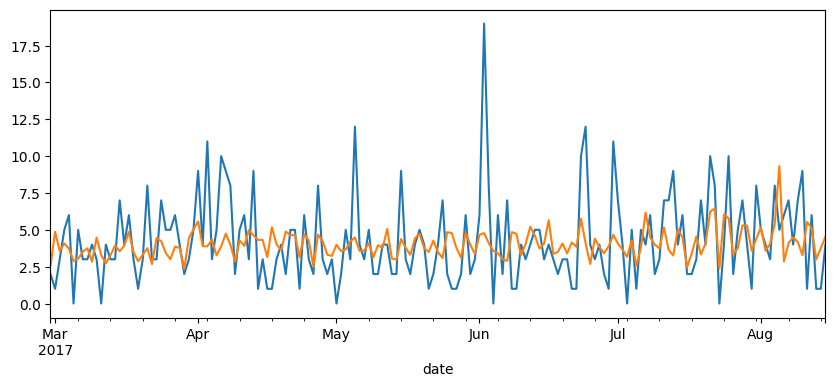

In [ ]:
model6 = sm.tsa.arima.model.ARIMA(df.sales, exog=exog, order=(50, 1, 2))
compare_to_test(model6, df_test, df_train)

R2 Score:  -0.19870664903355384
Mean Absolute Error:  2.350657738196889
Root Mean Squared Error:  3.1523535812557575


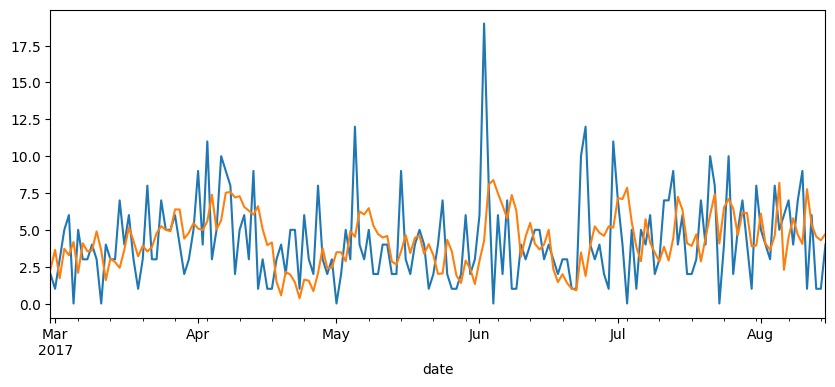

In [ ]:
model7 = sm.tsa.arima.model.ARIMA(df.sales, exog=exog, order=(30, 4, 3))
compare_to_test(model7, df_test, df_train)

R2 Score:  -1.0041313311271063
Mean Absolute Error:  3.2087333243137635
Root Mean Squared Error:  4.076069265605914


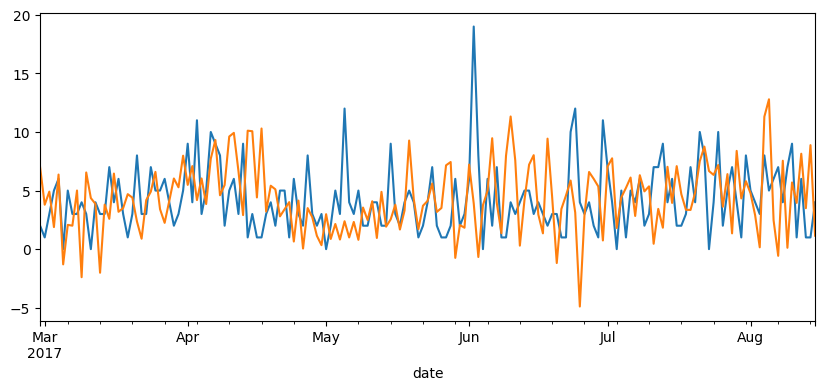

In [ ]:
model8 = sm.tsa.arima.model.ARIMA(df.sales, exog=exog, order=(50, 1, 2), seasonal_order=(0, 4, 1, 4))
compare_to_test(model8, df_test, df_train)

R2 Score:  -0.23395179922298537
Mean Absolute Error:  2.4022722190517216
Root Mean Squared Error:  3.19836161384334


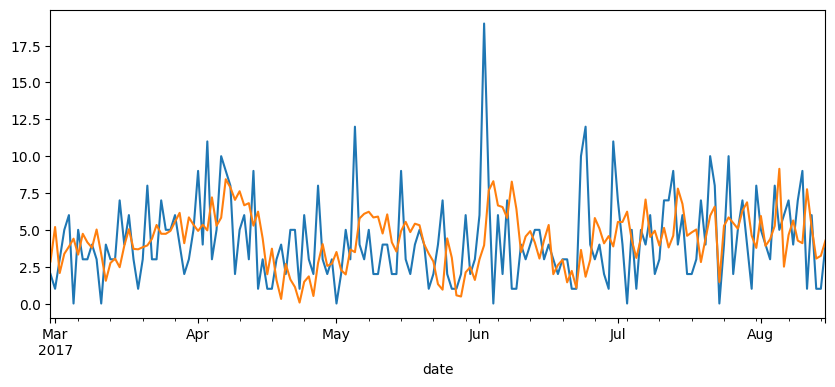

In [ ]:
model9 = sm.tsa.arima.model.ARIMA(df.sales, exog=exog, order=(50, 4, 3))
compare_to_test(model9, df_test, df_train)

R2 Score:  -9.357104424284895
Mean Absolute Error:  7.329164136763171
Root Mean Squared Error:  9.266114111317195


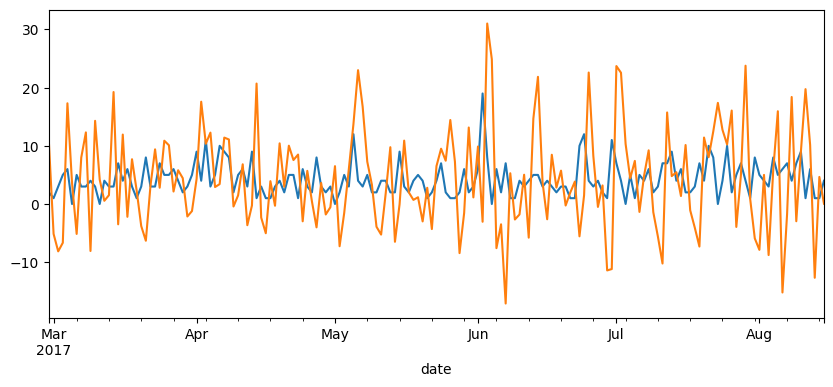

In [ ]:
model8 = sm.tsa.arima.model.ARIMA(df.sales, exog=exog, order=(50, 7, 2), seasonal_order=(0, 4, 12, 4))
compare_to_test(model8, df_test, df_train)

R2 Score:  -0.707438116015805
Mean Absolute Error:  2.9812746813748348
Root Mean Squared Error:  3.762278604302648


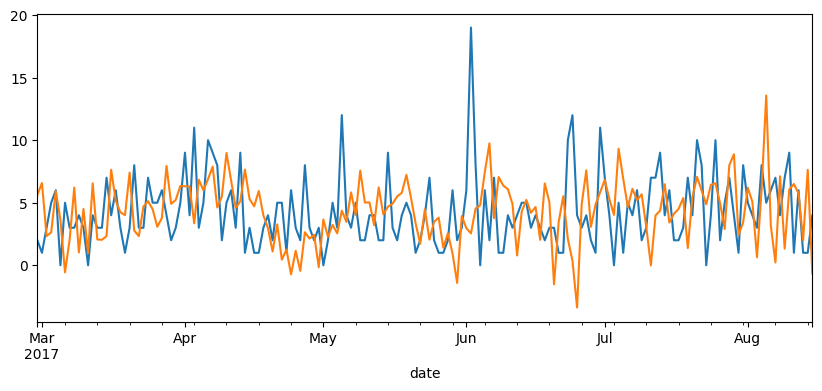

In [ ]:
model9 = sm.tsa.arima.model.ARIMA(df.sales, exog=exog, order=(50, 2, 2), seasonal_order=(0, 4, 12, 4))
compare_to_test(model9, df_test, df_train)

R2 Score:  0.07747661123446037
Mean Absolute Error:  2.082555635852437
Root Mean Squared Error:  2.7654585887349667


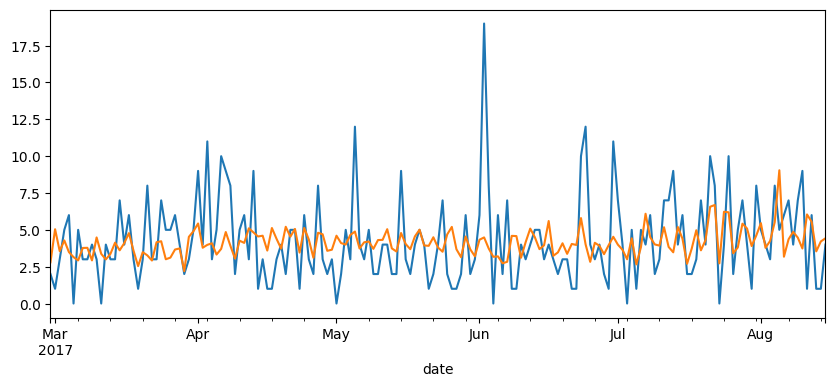

In [ ]:
model10 = sm.tsa.arima.model.ARIMA(df.sales, exog=exog, order=(50, 2, 2))
compare_to_test(model10, df_test, df_train)

R2 Score:  0.009685890263006813
Mean Absolute Error:  2.1366799102737137
Root Mean Squared Error:  2.8652660246826667


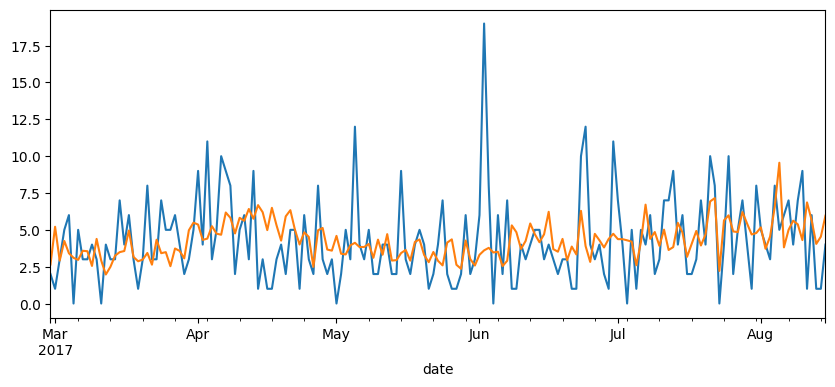

In [ ]:
model11 = sm.tsa.arima.model.ARIMA(df.sales, exog=exog, order=(60, 3, 2))
compare_to_test(model11, df_test, df_train)

R2 Score:  0.08147316774039903
Mean Absolute Error:  2.063989729023085
Root Mean Squared Error:  2.759461826020563


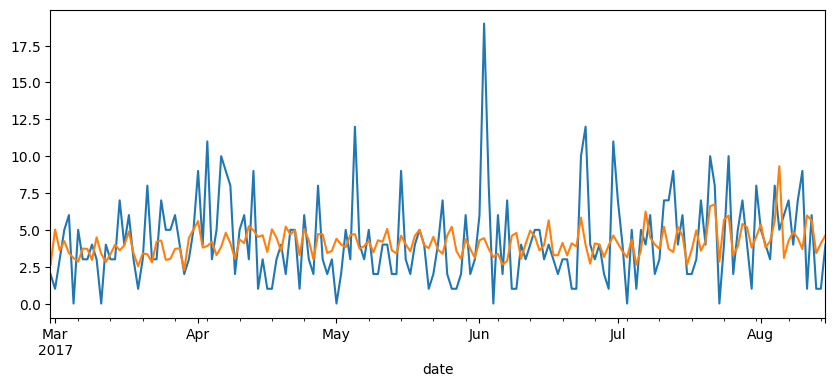

In [ ]:
model12 = sm.tsa.arima.model.ARIMA(df.sales, exog=exog, order=(50, 1, 0))
compare_to_test(model12, df_test, df_train)

R2 Score:  0.09816211159307264
Mean Absolute Error:  2.039051549318012
Root Mean Squared Error:  2.734278233695065


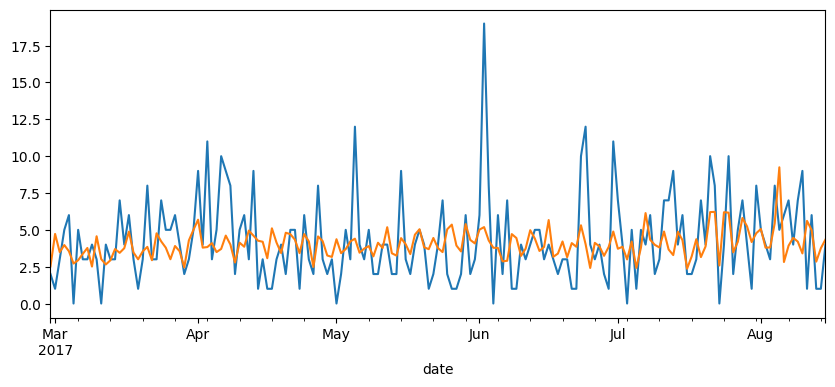

In [ ]:
model13 = sm.tsa.arima.model.ARIMA(df.sales, exog=exog, order=(60, 1, 2))
compare_to_test(model13, df_test, df_train)

(60, 1, 2) seems to be the optimal settings so far. Increasing d or deceasing q don't help. Deceasing p also doesn't help. The only way to go is to increase p or q. 

R2 Score:  0.09050604013954489
Mean Absolute Error:  2.0726716029412655
Root Mean Squared Error:  2.745859909530601


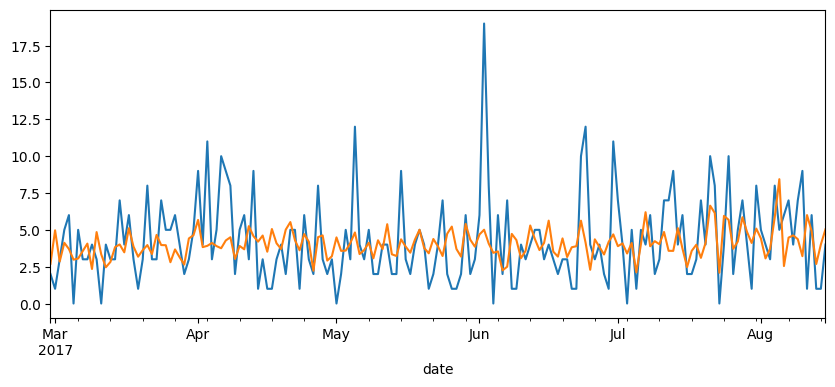

In [ ]:
model14 = sm.tsa.arima.model.ARIMA(df.sales, exog=exog, order=(60, 1, 10))
compare_to_test(model14, df_test, df_train)

R2 Score:  0.0888885812675928
Mean Absolute Error:  2.0703218323401775
Root Mean Squared Error:  2.7483004659249777


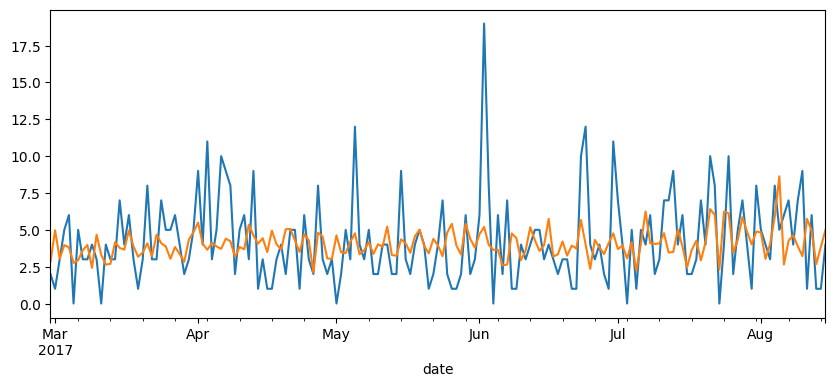

In [ ]:
model15 = sm.tsa.arima.model.ARIMA(df.sales, exog=exog, order=(60, 1, 4))
compare_to_test(model15, df_test, df_train)

R2 Score:  -6.377875300627526
Mean Absolute Error:  5.997516235751069
Root Mean Squared Error:  7.820672902078209


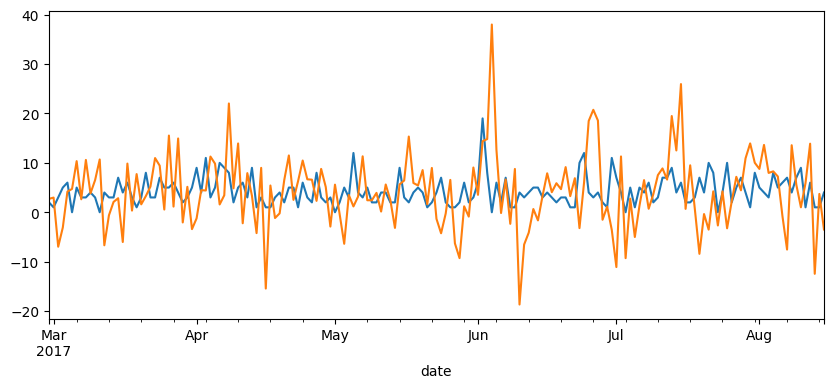

In [ ]:
model16 = sm.tsa.arima.model.ARIMA(df.sales, exog=exog, order=(60, 1, 2), seasonal_order=(0, 7, 0, 2))
compare_to_test(model16, df_test, df_train)

# Aggregated Forecasting

Forecasting for multiple products for multiple stores will be for stores 3 and 5 and for the frozen food and dairy product families. 

In [16]:
agg = train[(train['store_nbr'].isin([3, 5])) & (train['family'].isin(['FROZEN FOODS', 'DAIRY']))]
agg

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,734,3,DAIRY,0.000,0
2013-01-01,737,3,FROZEN FOODS,0.000,0
2013-01-01,1460,5,DAIRY,0.000,0
2013-01-01,1463,5,FROZEN FOODS,0.000,0
2013-01-02,2516,3,DAIRY,1606.000,0
...,...,...,...,...,...
2017-08-14,2998787,5,FROZEN FOODS,81.150,1
2017-08-15,2999840,3,DAIRY,1832.000,24
2017-08-15,2999843,3,FROZEN FOODS,273.655,1


### Seperate Forecasts

<AxesSubplot: xlabel='date'>

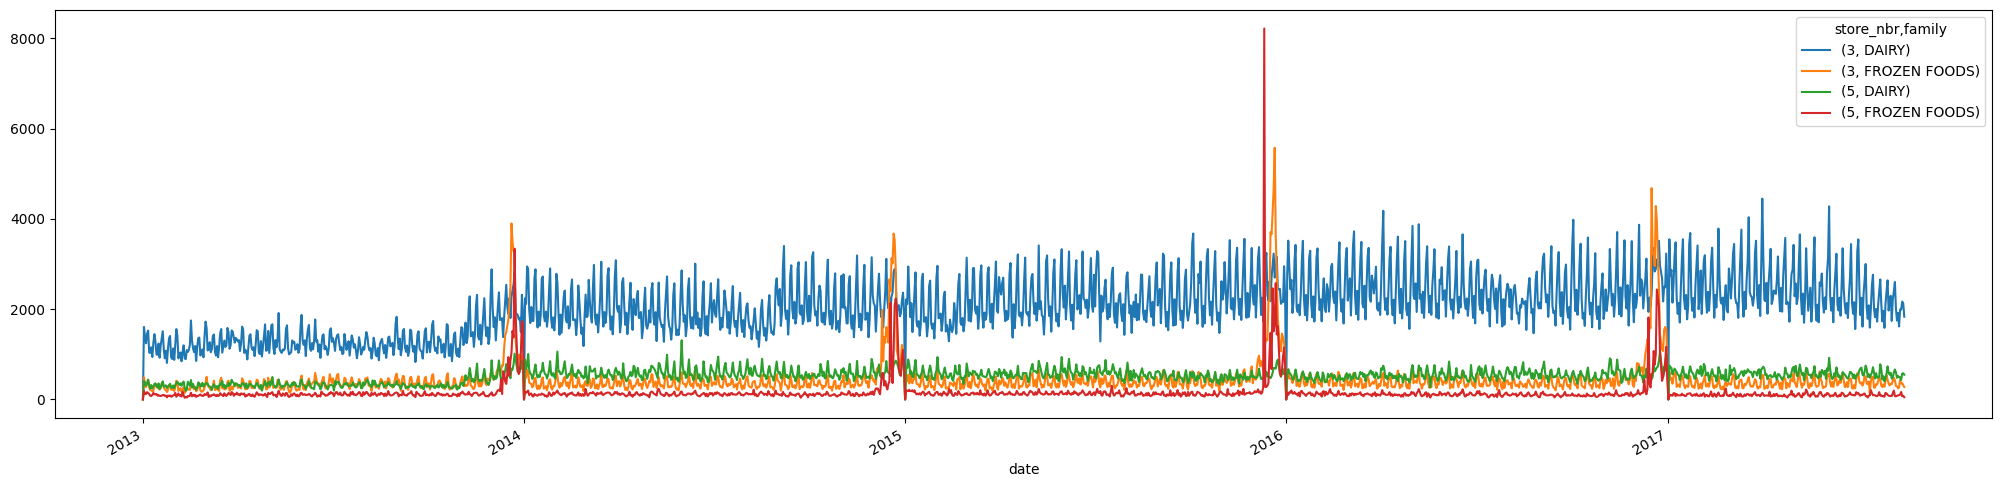

In [34]:
pivot = pd.pivot_table(agg, values='sales', index="date", columns=['store_nbr', 'family'], aggfunc=np.sum)
pivot.plot(kind='line', figsize=(25,6))

Blue is store 3 dairy. Orange is store 3 frozen foods. Green is store 5 dairy. Red is store 5 frozen foods.

In [56]:
blue = agg[(agg['store_nbr']==3) & (agg['family']=='DAIRY')]
orange = agg[(agg['store_nbr']==3) & (agg['family']=='FROZEN FOODS')]
green = agg[(agg['store_nbr']==5) & (agg['family']=='DAIRY')]
red = agg[(agg['store_nbr']==5) & (agg['family']=='FROZEN FOODS')]
dfs = {'blue':blue, 'orange':orange, 'green':green, 'red':red}
models = {}

for i in dfs:
    df_train, df_test = train_test_split(dfs[i], test_size=0.10, random_state=5, shuffle=False)
    dummy = sm.tsa.arima.model.ARIMA(dfs[i].sales, order=(10, 1, 2))
    models[i] = {'model':dummy, 'train':df_train, 'test':df_test}

R2 Score: 0.5513613890787725
Mean Absolute Error: 276.58104190611175
Root Mean Squared Error: 373.74751824327086
MAPE: 0.11127313622473095


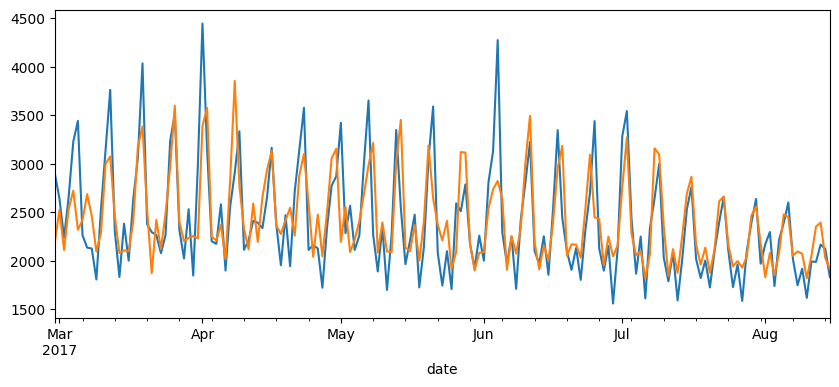

In [57]:
compare_to_test(models['blue']['model'], models['blue']['test'], models['blue']['train'])

R2 Score: 0.15348116532557987
Mean Absolute Error: 70.73471399748132
Root Mean Squared Error: 91.10607711887815
MAPE: 0.20734776417348857


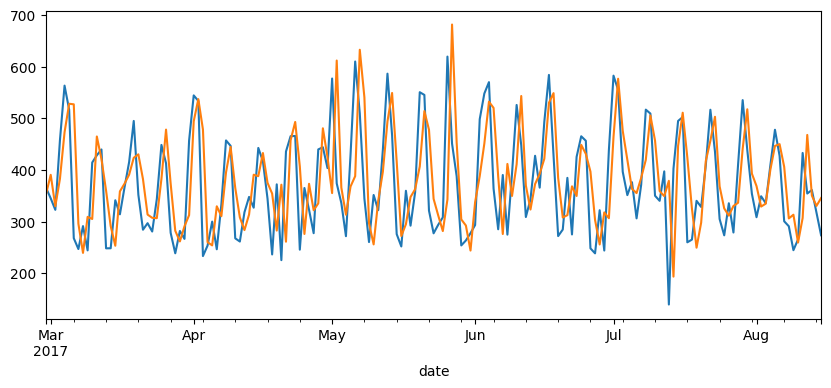

In [58]:
compare_to_test(models['orange']['model'], models['orange']['test'], models['orange']['train'])

R2 Score: 0.21650069696536556
Mean Absolute Error: 58.71353254894197
Root Mean Squared Error: 77.79560391881544
MAPE: 0.10333446732788404


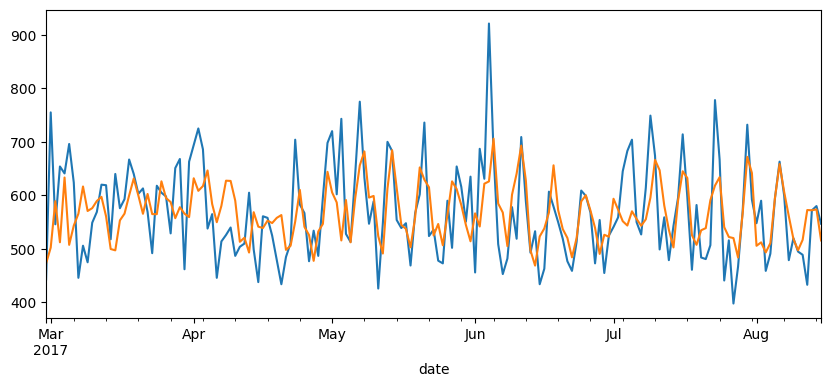

In [59]:
compare_to_test(models['green']['model'], models['green']['test'], models['green']['train'])

R2 Score: -0.22856397749594204
Mean Absolute Error: 31.39637614991483
Root Mean Squared Error: 36.96503748570609
MAPE: 0.3706913839502724


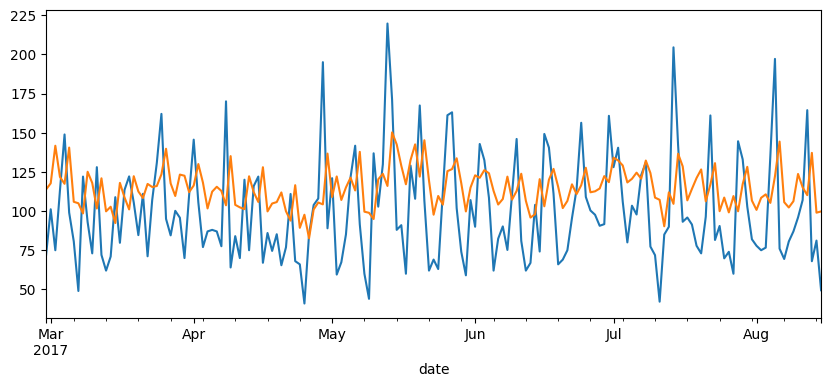

In [60]:
compare_to_test(models['red']['model'], models['red']['test'], models['red']['train'])

### Clustered Forecasts

Cluster one is the sum of the green, orange and red while cluster two is just the blue.

In [61]:
cluster_1 = green + orange + red
cluster_2 = blue
clusters = {'cluster_1':cluster_1, 'cluster_2':cluster_2}
cluster_models = {}

for i in clusters:
    df_train, df_test = train_test_split(clusters[i], test_size=0.10, random_state=5, shuffle=False)
    dummy = sm.tsa.arima.model.ARIMA(clusters[i].sales, order=(10, 1, 2))
    cluster_models[i] = {'model':dummy, 'train':df_train, 'test':df_test}

R2 Score: 0.1677078800159374
Mean Absolute Error: 131.81690809312528
Root Mean Squared Error: 160.12216525938015
MAPE: 0.1317776627151254


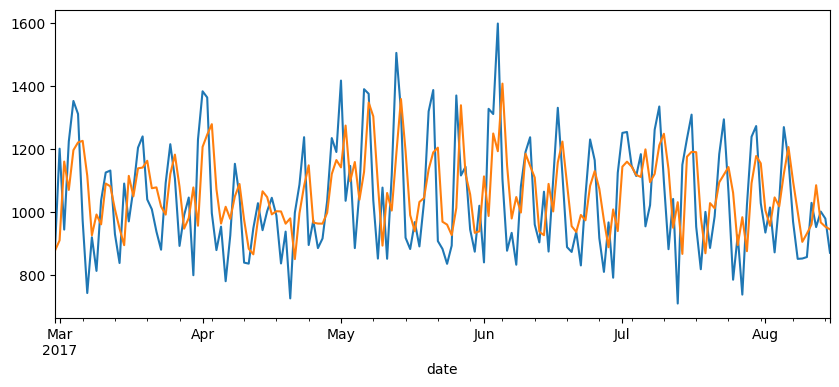

In [62]:
compare_to_test(cluster_models['cluster_1']['model'], cluster_models['cluster_1']['test'], cluster_models['cluster_1']['train'])

R2 Score: 0.5513613890787725
Mean Absolute Error: 276.58104190611175
Root Mean Squared Error: 373.74751824327086
MAPE: 0.11127313622473095


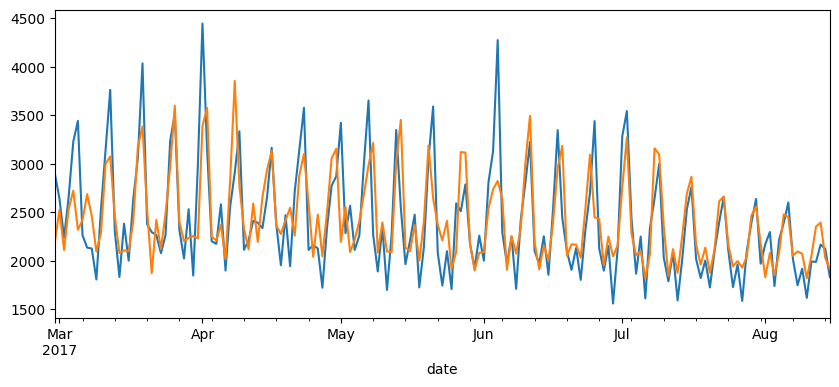

In [63]:
compare_to_test(cluster_models['cluster_2']['model'], cluster_models['cluster_2']['test'], cluster_models['cluster_2']['train'])

In [7]:
print(f'Average R2 for seperate forecasts: {(0.7153778144724827 + 0.38093404696101063 + 0.3680472617063415 + 0.49274072926544377)/4}')

Average R2 for seperate forecasts: 0.4892749631013197


In [6]:
print(f'Average R2 for clusters: {(0.4385478359207402 + 0.7153778144724827)/2}')

Average R2 for clusters: 0.5769628251966115


### Overall Forecast

The overall forecast is the sum of all of the different products from different stores

In [64]:
overall = green + orange + red + blue
df_train, df_test = train_test_split(overall, test_size=0.10, random_state=5, shuffle=False)
dummy = sm.tsa.arima.model.ARIMA(overall.sales, order=(10, 1, 2))

R2 Score: 0.47431949431661635
Mean Absolute Error: 394.19545446031486
Root Mean Squared Error: 511.76237496368213
MAPE: 0.11501428919902562


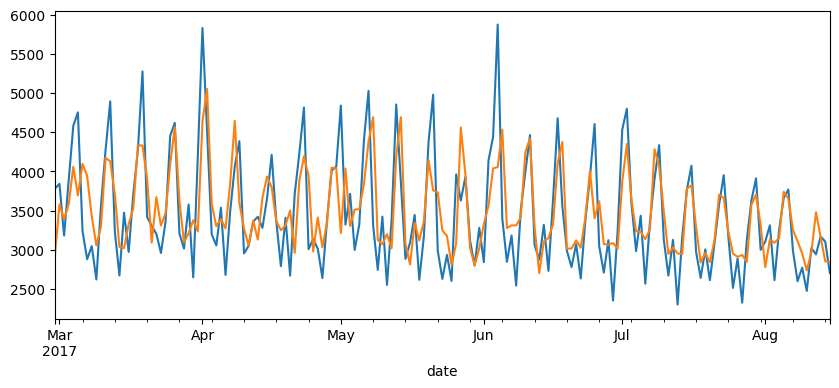

In [65]:
compare_to_test(dummy, df_test, df_train)

# Hierarchical Clustering

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [80.0, 80.0, 102.5, 102.5],
  [60.0, 60.0, 91.25, 91.25],
  [125.0, 125.0, 135.0, 135.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [152.5, 152.5, 183.75, 183.75],
  [130.0, 130.0, 168.125, 168.125],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [255.0, 255.0, 265.0, 265.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [260.0, 260.0, 282.5, 282.5],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [312.5, 312.5, 342.5, 342.5],
  [271.25, 271.25, 327.5, 327.5],
  [385.0, 385.0, 395

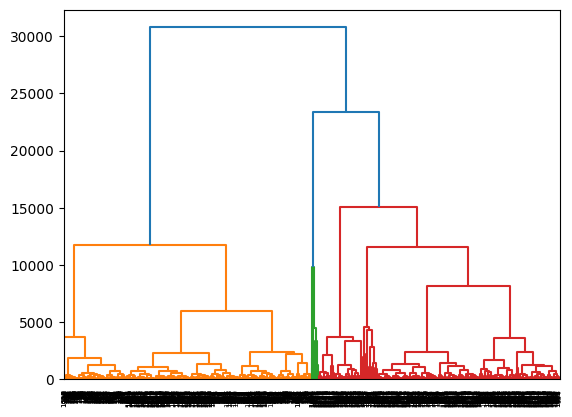

In [36]:
linkage_data = linkage(pivot, method='ward', metric='euclidean')
dendrogram(linkage_data)

In [39]:
distance_matrix = pivot.corr()
distance_matrix

store_nbr                      3                      5             
family                     DAIRY FROZEN FOODS     DAIRY FROZEN FOODS
store_nbr family                                                    
3         DAIRY         1.000000     0.317908  0.729589     0.138682
          FROZEN FOODS  0.317908     1.000000  0.281922     0.627508
5         DAIRY         0.729589     0.281922  1.000000     0.201226
          FROZEN FOODS  0.138682     0.627508  0.201226     1.000000

In [16]:
def hierarchical_clustering(dist_mat, method='complete'):
    if method == 'complete':
        Z = complete(dist_mat)
    if method == 'single':
        Z = single(dist_mat)
    if method == 'average':
        Z = average(dist_mat)
    if method == 'ward':
        Z = ward(dist_mat)
    
    fig = plt.figure(figsize=(25, 8))
    dn = dendrogram(Z, labels=dist_mat.columns)
    plt.title(f"Dendrogram for {method}-linkage with correlation distance")
    plt.show()

1. using these two new clusters find agg R2 and compare to previous 2 models

In [53]:
cluster_1 = orange + red
cluster_2 = blue + green
clusters = {'cluster_1':cluster_1, 'cluster_2':cluster_2}
cluster_models = {}

for i in clusters:
    df_train, df_test = train_test_split(clusters[i], test_size=0.10, random_state=5, shuffle=False)
    dummy = sm.tsa.arima.model.ARIMA(clusters[i].sales, exog=exog, order=(10, 1, 2))
    cluster_models[i] = {'model':dummy, 'train':df_train, 'test':df_test}

R2 Score: 0.12211792715967462
Mean Absolute Error: 94.47779164163174
Root Mean Squared Error: 113.8537220551023
MAPE: 0.20981662616930685


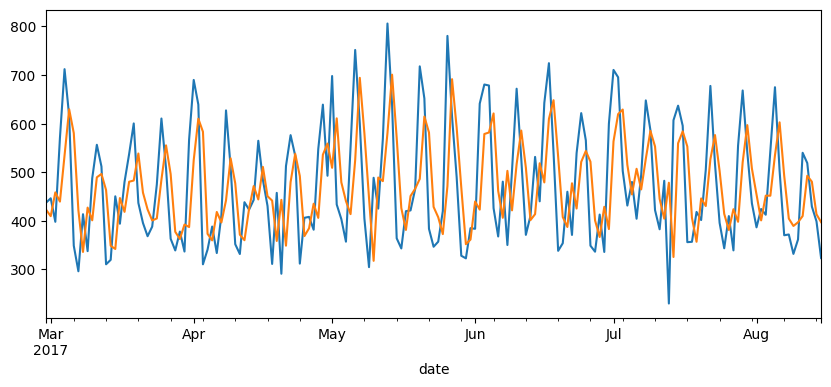

In [54]:
compare_to_test(cluster_models['cluster_1']['model'], cluster_models['cluster_1']['test'], cluster_models['cluster_1']['train'])

R2 Score: 0.08682110704376778
Mean Absolute Error: 461.86005566399007
Root Mean Squared Error: 587.6661541089248
MAPE: 0.154960020649929


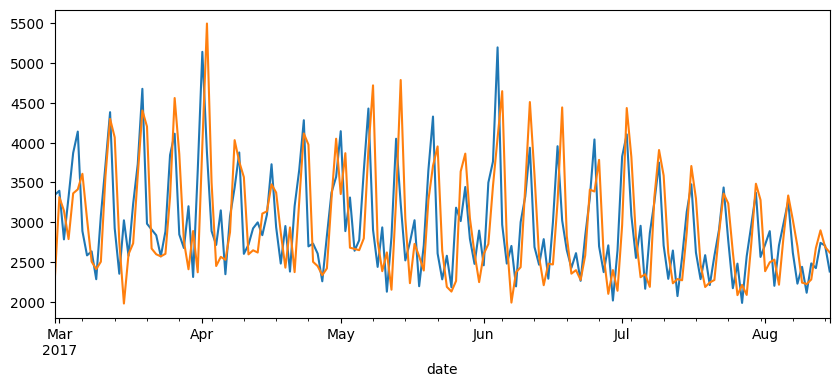

In [55]:
compare_to_test(cluster_models['cluster_2']['model'], cluster_models['cluster_2']['test'], cluster_models['cluster_2']['train'])

In [28]:
print(f'Average R2 score: {(0.12211792715967462+0.08682110704376778)/2}')

Average R2 score: 0.1044695171017212


It seems that that clustering with the dendogram results in much worse average R2 score than forecasting seperately or with visually eyeballed clusters

# Advanced Clustering

comparing baseline of store vs category - aggregate of modeling done in step 2 - compared to all series modelled separately 

(2 different linkage method, compare 2 different distance cutoffs, use one more clustering algo)

5 - 8 experiments using sub optimal 

In [17]:
products = pd.pivot_table(train, values='sales', index="date", columns=['family'], aggfunc=np.sum)
stores = pd.pivot_table(train, values='sales', index="date", columns=['store_nbr'], aggfunc=np.sum)
products_matrix = products.corr()
stores_matrix = stores.corr()

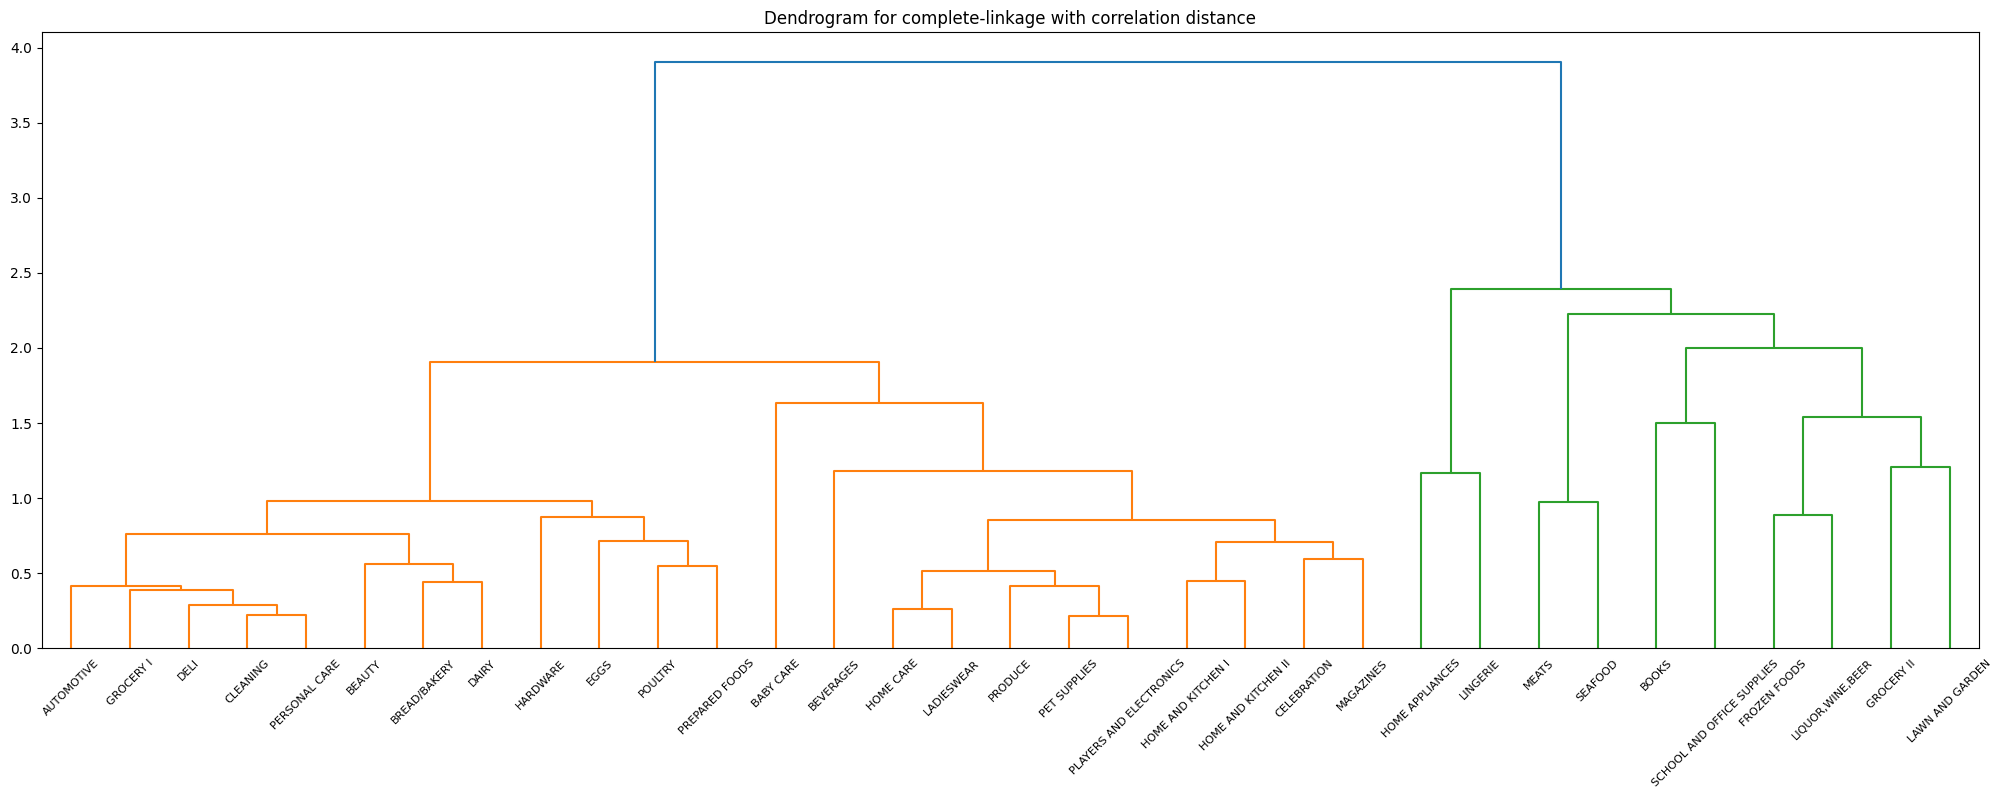

In [47]:
hierarchical_clustering(products_matrix)

In [30]:
product_hierarchy = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')
product_labels = list(zip(product_hierarchy.fit_predict(products_matrix), products_matrix.columns))
product_labels

[(5, 'AUTOMOTIVE'),
 (0, 'BABY CARE'),
 (5, 'BEAUTY'),
 (0, 'BEVERAGES'),
 (4, 'BOOKS'),
 (5, 'BREAD/BAKERY'),
 (0, 'CELEBRATION'),
 (5, 'CLEANING'),
 (5, 'DAIRY'),
 (5, 'DELI'),
 (5, 'EGGS'),
 (1, 'FROZEN FOODS'),
 (5, 'GROCERY I'),
 (1, 'GROCERY II'),
 (5, 'HARDWARE'),
 (0, 'HOME AND KITCHEN I'),
 (0, 'HOME AND KITCHEN II'),
 (2, 'HOME APPLIANCES'),
 (0, 'HOME CARE'),
 (0, 'LADIESWEAR'),
 (1, 'LAWN AND GARDEN'),
 (2, 'LINGERIE'),
 (1, 'LIQUOR,WINE,BEER'),
 (0, 'MAGAZINES'),
 (3, 'MEATS'),
 (5, 'PERSONAL CARE'),
 (0, 'PET SUPPLIES'),
 (0, 'PLAYERS AND ELECTRONICS'),
 (5, 'POULTRY'),
 (5, 'PREPARED FOODS'),
 (0, 'PRODUCE'),
 (4, 'SCHOOL AND OFFICE SUPPLIES'),
 (3, 'SEAFOOD')]

In [31]:
product_clusters = {}
for j in range(0, 6):
    dummy = []
    for i in product_labels:
        if i[0] == j:
            dummy.append(i[1])
    product_clusters[f'cluster_{j}'] = dummy

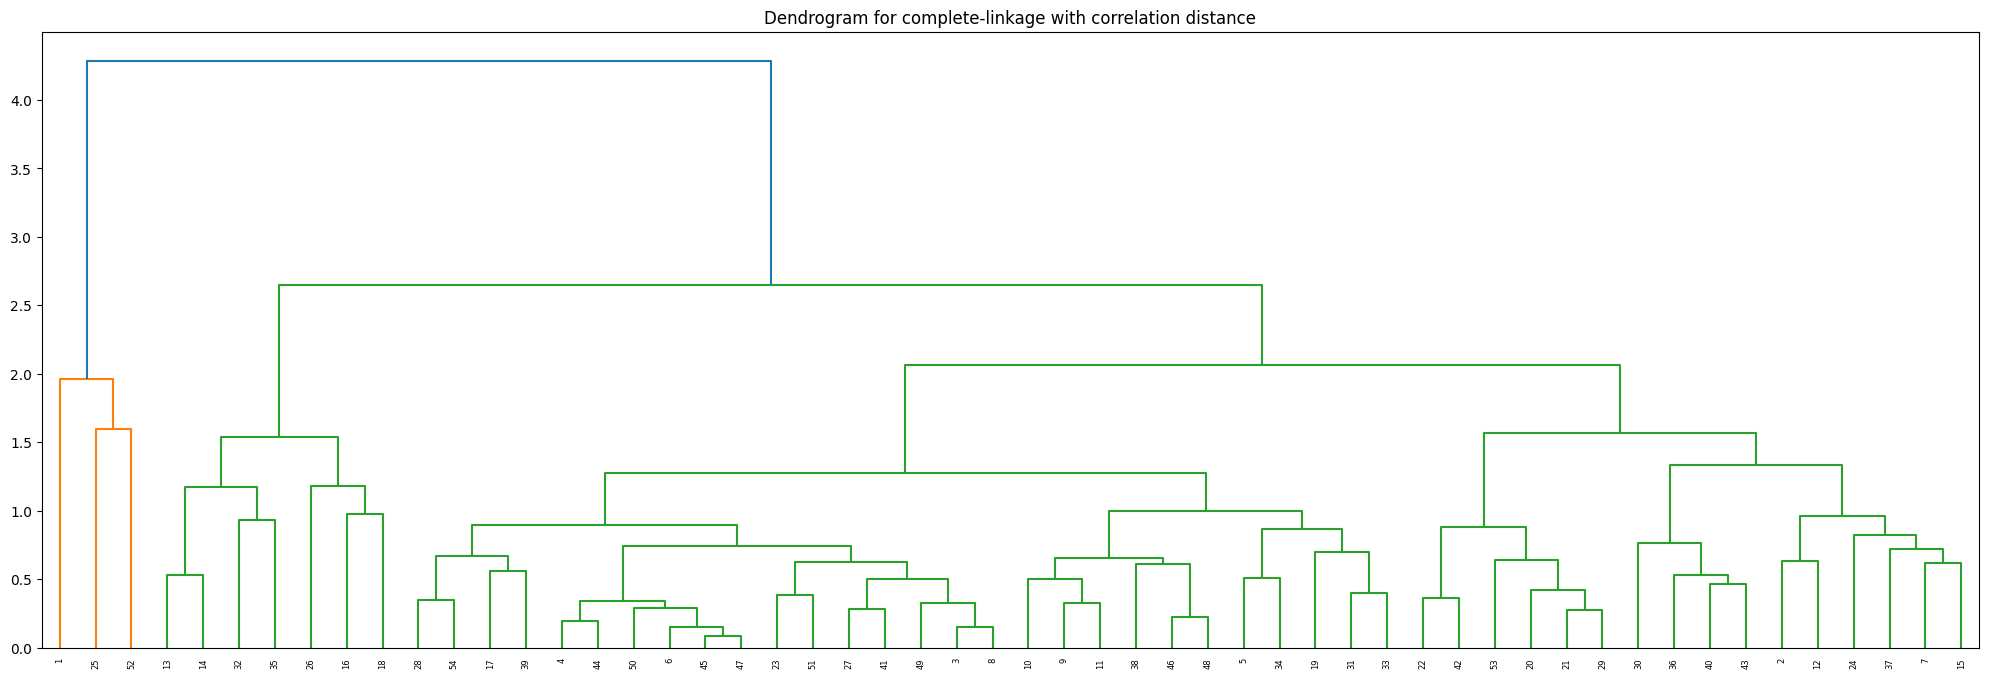

In [48]:
hierarchical_clustering(stores_matrix)

In [37]:
store_hierarchy = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='complete')
store_labels = list(zip(store_hierarchy.fit_predict(stores_matrix), stores_matrix.columns))
store_labels

[(9, 1),
 (3, 2),
 (4, 3),
 (4, 4),
 (2, 5),
 (4, 6),
 (3, 7),
 (4, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (3, 12),
 (1, 13),
 (1, 14),
 (3, 15),
 (0, 16),
 (4, 17),
 (0, 18),
 (2, 19),
 (6, 20),
 (6, 21),
 (6, 22),
 (4, 23),
 (3, 24),
 (5, 25),
 (0, 26),
 (4, 27),
 (4, 28),
 (6, 29),
 (8, 30),
 (2, 31),
 (1, 32),
 (2, 33),
 (2, 34),
 (1, 35),
 (8, 36),
 (3, 37),
 (2, 38),
 (4, 39),
 (8, 40),
 (4, 41),
 (6, 42),
 (8, 43),
 (4, 44),
 (4, 45),
 (2, 46),
 (4, 47),
 (2, 48),
 (4, 49),
 (4, 50),
 (4, 51),
 (7, 52),
 (6, 53),
 (4, 54)]

find optimal cluster of all the foods + optimal cluster of all the stores = union of two sets forecasted separately 

In [38]:
store_clusters = {}
for j in range(0, 10):
    dummy = []
    for i in store_labels:
        if i[0] == j:
            dummy.append(i[1])
    store_clusters[f'cluster_{j}'] = dummy

In [59]:
cluster_dfs = {}
for i in store_clusters:
    for j in product_clusters:
        agg = train[(train['family'].isin(product_clusters[j])) & (train['store_nbr'].isin(store_clusters[i]))]
        cluster_dfs[f'store_{i}_product_{j}'] = pd.pivot_table(agg, values='sales', index="date", aggfunc=np.sum)

In [61]:
for i in cluster_dfs:
    df_train, df_test = train_test_split(cluster_dfs[i], test_size=0.10, random_state=5, shuffle=False)
    dummy = sm.tsa.arima.model.ARIMA(cluster_dfs[i], order=(10, 1, 2))
    cluster_models[i] = {'model':dummy, 'train':df_train, 'test':df_test}

In [70]:
def mass_compare_to_test(model, df_test, df_train):
    model_fit = model.fit()
    pred = model_fit.predict(start=len(df_train), end=len(df_train)+len(df_test)-1)
    if pred.index.dtype == int:
        pred.index = df_test.index
    print(f"R2 Score: {r2_score(df_test.sales, pred)}")
    print(f"Mean Absolute Error: {mean_absolute_error(df_test.sales, pred)}")
    print(f"Root Mean Squared Error: {mean_squared_error(df_test.sales, pred, squared=False)}")
    print(f"MAPE: {mean_absolute_percentage_error(df_test.sales, pred)}")
    return r2_score(df_test.sales, pred)

In [75]:
R2 = []
for i in cluster_models:
    r2 = mass_compare_to_test(cluster_models[i]['model'], cluster_models[i]['test'], cluster_models[i]['train'])
    R2.append(r2)

R2 Score: 0.41849449972760466
Mean Absolute Error: 1268.06695053336
Root Mean Squared Error: 1617.422155980722
MAPE: 0.14499124105182715
R2 Score: -0.012271296177887026
Mean Absolute Error: 99.2153875731994
Root Mean Squared Error: 138.19486165395608
MAPE: 0.3366571965202179
R2 Score: 0.10505126374406915
Mean Absolute Error: 4.037679044008268
Root Mean Squared Error: 5.117224351853078
MAPE: 231233067753617.9
R2 Score: 0.23782608814667328
Mean Absolute Error: 73.89528091020135
Root Mean Squared Error: 93.9374995757436
MAPE: 0.16620573285771248
R2 Score: 0.6065780671366556
Mean Absolute Error: 9.279935526464197
Root Mean Squared Error: 15.353196284677345
MAPE: 729011272998555.2
R2 Score: 0.328166083256369
Mean Absolute Error: 1966.650034530481
Root Mean Squared Error: 2790.074249546633
MAPE: 0.14046427350509677
R2 Score: 0.42495115659484206
Mean Absolute Error: 812.0349517673407
Root Mean Squared Error: 1075.0282989132054
MAPE: 0.1050314833311327
R2 Score: 0.2914022877032342
Mean Absolut

In [76]:
sum(R2)/len(R2)

0.4235790968405935

This advanced clustering leads to a lower average R2 value than with the previous clustering attempts. However, this is with 60 different clusters rather than 2 from before. 

# Signal Decomposition

Inside signal decomposition (other exog working) notebook

undefined. decompose series to find signals within optimal clusters 

undefined. filter noise in each cluster and use signal - did our R2 improve?

# Optimal ARIMA Model

Inside Final ARIMA notebook

undefined. run the optimal tuning params

undefined. contextualize signals with baseline exogs and then generated exogs

undefined. Root Mean Squared Logarithmic Error

chose between - XGboost - LSTM